# Probability Theory

Using NumPy, you can demonstrate key aspects of probability distributions like the Normal, Binomial, and Poisson distributions. 

## Probability distributions (e.g., normal, binomial, Poisson)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Optional for additional visualization

# Set a style for plots
plt.style.use('seaborn-darkgrid')

# Simulate data for Normal, Binomial, and Poisson distributions


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Normal Distribution

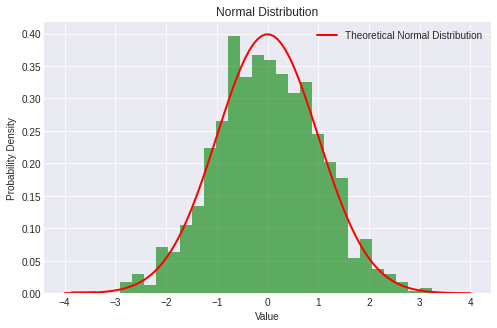

In [2]:
# Mean and standard deviation for the Normal distribution
mean = 0
std_dev = 1

# Generate 1000 random samples from a Normal distribution
normal_data = np.random.normal(mean, std_dev, 1000)

# Create a histogram to visualize the Normal distribution
plt.figure(figsize=(8, 5))
plt.hist(normal_data, bins=30, density=True, alpha=0.6, color='g')

# Plot the theoretical Normal distribution for reference
x = np.linspace(-4, 4, 100)
y = (1/(np.sqrt(2*np.pi*std_dev**2))) * np.exp(-((x - mean)**2) / (2*std_dev**2))
plt.plot(x, y, 'r-', lw=2, label='Theoretical Normal Distribution')

# Title and labels
plt.title("Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.legend()
plt.show()


### Binomial Distribution

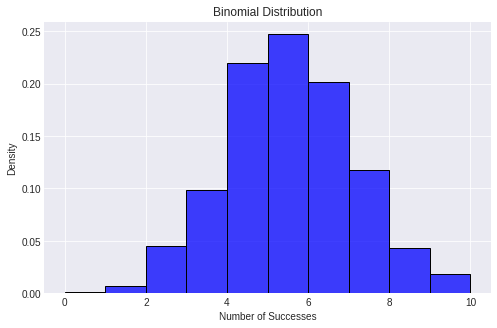

In [3]:
# Parameters for the Binomial distribution
n_trials = 10  # Number of trials
p_success = 0.5  # Probability of success in each trial

# Generate 1000 random samples from a Binomial distribution
binomial_data = np.random.binomial(n_trials, p_success, 1000)

# Create a histogram to visualize the Binomial distribution
plt.figure(figsize=(8, 5))
sns.histplot(binomial_data, kde=False, bins=10, color='b', stat='density')

# Title and labels
plt.title("Binomial Distribution")
plt.xlabel("Number of Successes")
plt.ylabel("Density")
plt.show()


### Comparing Distributions

In [9]:

# Sample data for distributions
normal_data = np.random.normal(loc=5, scale=2, size=1000)
binomial_data = np.random.binomial(n=10, p=0.7, size=1000)
poisson_data = np.random.poisson(lam=3, size=1000)

# Calculate basic statistics
normal_mean = np.mean(normal_data)
normal_std = np.std(normal_data)

binomial_mean = np.mean(binomial_data)
binomial_std = np.std(binomial_data)

poisson_mean = np.mean(poisson_data)
poisson_std = np.std(poisson_data)

# Print statistics for comparison
print("Normal Distribution:")
print(f"  Mean: {normal_mean:.2f}")
print(f"  Std Dev: {normal_std:.2f}")

print("\nBinomial Distribution:")
print(f"  Mean: {binomial_mean:.2f}")
print(f"  Std Dev: {binomial_std:.2f}")

print("\nPoisson Distribution:")
print(f"  Mean: {poisson_mean:.2f}")
print(f"  Std Dev: {poisson_std:.2f}")


Normal Distribution:
  Mean: 5.05
  Std Dev: 2.08

Binomial Distribution:
  Mean: 7.04
  Std Dev: 1.36

Poisson Distribution:
  Mean: 3.10
  Std Dev: 1.72


## Joint and Conditional Probabilities

### Joint Probability

Joint probability describes the likelihood of two (or more) events happening simultaneously. Let's calculate the joint probability of events `A` and `B` from a dataset.

Suppose we have a dataset with two boolean variables, `A` and `B`, representing whether two conditions are true. We'll create a small dataset and calculate the joint probability of `A` and `B` occurring together.


In [1]:
import numpy as np

# Sample data with 0 indicating False and 1 indicating True
data = np.array([
    [1, 1],
    [0, 1],
    [1, 0],
    [0, 0],
    [1, 1]
])

# Separate the columns into variables A and B
A = data[:, 0]
B = data[:, 1]

# Calculate the joint probability of A and B both being True
joint_prob_A_B = np.mean((A == 1) & (B == 1))
print("Joint Probability of A and B being True:", joint_prob_A_B)


Joint Probability of A and B being True: 0.4


### Conditional Probability

In [15]:
prob_B = np.mean(B == 1)
print(prob_B)
prob_A = np.mean(A == 1)
print(prob_A)
add = np.mean((B == 1) & (A == 1))
print(add)

0.6
0.6
0.4


Conditional probability describes the likelihood of an event occurring given that another event has already occurred. Let's find the conditional probability of `A` given `B`.

In [2]:
# Calculate the conditional probability of A being True given B is True
# P(A | B) = P(A and B) / P(B)

# Probability of B being True
prob_B = np.mean(B == 1)

# Joint probability of A and B being True
joint_prob_A_B = np.mean((A == 1) & (B == 1))

# Conditional probability of A given B
conditional_prob_A_given_B = joint_prob_A_B / prob_B
print("Conditional Probability of A given B is True:", conditional_prob_A_given_B)


Conditional Probability of A given B is True: 0.6666666666666667


### Using Joint and Conditional Probabilities in Classification

In data science, joint and conditional probabilities play a role in probabilistic classification algorithms like Naive Bayes. Let's consider a simple example where we classify a new data point based on observed features.

In [20]:
# Sample data for classification with labels 0 or 1
data = np.array([
    [1, 1, 0],  # Feature 1, Feature 2, Label
    [1, 0, 1],
    [0, 1, 0],
    [0, 0, 1],
    [1, 1, 1]
])

# Features and labels
X = data[:, :2]
y = data[:, 2]

# Calculate joint probabilities for each label
# P(X_1, X_2, y)
joint_probs = {}
for label in np.unique(y):
    mask = (y == label)
    joint_probs[label] = np.mean(X[mask], axis=0)

print("Joint Probabilities for each label:", joint_probs)

# Given a new data point, predict the label based on maximum conditional probability
new_data_point = np.array([1, 1])  # New observation

# Calculate probabilities for each label based on joint probabilities
predictions = {label: np.prod(joint_probs[label]) for label in joint_probs}
predicted_label = max(predictions, key=predictions.get)

print("Predicted label for new data point:", predicted_label)

Joint Probabilities for each label: {0: array([0.5, 1. ]), 1: array([0.66666667, 0.33333333])}
Predicted label for new data point: 0
